## Homework 1(See the bottom)

## Due on April 13, 18:00PM
## Describe the each person's role

# 스타워즈 대본 네트워크
- 데이터출처 : https://www.imsdb.com/
- 참고 : https://brunch.co.kr/@goodvc78/1
- 데이터 : `StarWars_scripts.xlsx`
- 속성 : `episode`,`scene_num`,`sequence`,`place`,`type`,`actor`,`dialogue`

에피소드 목록

+ Episode I   - 보이지 않는 위협, The Phantom Menace (1999)
+ Episode II  - 클론의 습격, Attack of the Clones (2002)
+ Episode III - 시스의 복수, Revenge of the Sith (2005)
+ Episode IV  - 새로운 희망, A New Hope (1977)
+ Episode V   - 제국의 역습, The Empire Strikes Back (1980)
+ Episode VI  - 제다이의 귀환, Return of the Jedi (1983)

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
from itertools import combinations # To use combination
import networkx as nx # For network analysis
import pandas as pd # To use DataFrame
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
total_df=pd.read_excel('./StarWars_scripts.xlsx')
ep1_df=total_df[total_df['episode'].isin([1])]
#ori_df=total_df[total_df['episode'].isin([4,5,6])]


In [3]:
print(total_df.shape)
#print(ori_df.shape)
total_df.head()

(5407, 8)


Unnamed: 0  episode  scene_num  sequence             place type    actor  \
0           0        1          1         1  REPUBLIC CRUISER  INT  QUI-GON   
1           1        1          1         2  REPUBLIC CRUISER  INT  CAPTAIN   
2           2        1          1         3  REPUBLIC CRUISER  INT  QUI-GON   
3           3        1          1         4  REPUBLIC CRUISER  INT  CAPTAIN   
4           4        1          1         5  REPUBLIC CRUISER  INT  CAPTAIN   

                                            dialogue  
0                                           Captain.  
1                                          Yes, sir?  
2                Tell them we wish to board at once.  
3                                          Yes, sir.  
4  With all due respect for the Trade Federation,...

## 네트워크 만들기
**Actor-Actor Network (AA network)**

**같은 scene에 있는 actor들을 연결하는 네트워크 만들기**
- Node : Actor
- Edge : Co-occurrence in the same scene
 

 1. 'scene_num' 총 갯수를 구하기: set 함수 활용
 2. 같은 'scene_num" 에 들어 있는 actor 를 모으기
 3. 같은 'scene_num" 에 들어 있는 actor 를 연결하기 : combinations()활용

In [8]:
#print(total_df['scene_num'])
#set(total_df['scene_num'])              

In [13]:
for ii in set(ep1_df['scene_num']):
        act=ep1_df[ep1_df['scene_num']==ii]['actor']
        print(ii)
        print(act)
        act=set(act)
        print(act)
        
#print(act)

1
0    QUI-GON
1    CAPTAIN
2    QUI-GON
3    CAPTAIN
4    CAPTAIN
5       NUTE
Name: actor, dtype: object
{'QUI-GON', 'NUTE', 'CAPTAIN'}
3
6     PK-4
7    TC-14
8     EG-9
9     PR-4
Name: actor, dtype: object
{'TC-14', 'PK-4', 'PR-4', 'EG-9'}
4
10      TC-14
11    OBI-WAN
12    QUI-GON
13    OBI-WAN
14    QUI-GON
15    OBI-WAN
16    QUI-GON
17    OBI-WAN
18    QUI-GON
Name: actor, dtype: object
{'TC-14', 'QUI-GON', 'OBI-WAN'}
5
19      NUTE
20     TC-14
21    DOFINE
Name: actor, dtype: object
{'TC-14', 'DOFINE', 'NUTE'}
6
22     NUTE
23    TC-14
Name: actor, dtype: object
{'TC-14', 'NUTE'}
7
24    OWO-1
25     NUTE
26     RUNE
27     NUTE
28     RUNE
29     NUTE
30     RUNE
Name: actor, dtype: object
{'OWO-1', 'RUNE', 'NUTE'}
9
31    NUTE
32    RUNE
33    NUTE
34    RUNE
Name: actor, dtype: object
{'RUNE', 'NUTE'}
10
35    QUI-GON
36    OBI-WAN
37       P-59
38    OBI-WAN
39    QUI-GON
Name: actor, dtype: object
{'QUI-GON', 'OBI-WAN', 'P-59'}
11
40       RUNE
41    TEY HOW
Name: acto

In [14]:
list(combinations({'CAPTAIN', 'NUTE', 'QUI-GON'},2))


[('QUI-GON', 'NUTE'), ('QUI-GON', 'CAPTAIN'), ('NUTE', 'CAPTAIN')]

In [15]:
from collections import defaultdict
edges = defaultdict(int)
nodes = defaultdict(int)

for (n1,n2) in list(combinations({'CAPTAIN', 'NUTE', 'QUI-GON'},2)):
            print(n1,n2)
            edges[(n1,n2)] += 1
            nodes[n1] += 1
            nodes[n2] += 1

QUI-GON NUTE
QUI-GON CAPTAIN
NUTE CAPTAIN


In [16]:
edges

defaultdict(int,
            {('QUI-GON', 'NUTE'): 1,
             ('QUI-GON', 'CAPTAIN'): 1,
             ('NUTE', 'CAPTAIN'): 1})

In [18]:
edges.items()

dict_items([(('QUI-GON', 'NUTE'), 1), (('QUI-GON', 'CAPTAIN'), 1), (('NUTE', 'CAPTAIN'), 1)])

### Network

In [19]:
G=nx.Graph()
for (n,v) in edges.items():
    G.add_edge(n[0],n[1],weight=v)

In [38]:
#nodes.items()
edges.items()
#list(G.edges)

dict_items([(('QUI-GON', 'CAPTAIN'), 1), (('QUI-GON', 'NUTE'), 1), (('CAPTAIN', 'NUTE'), 1)])

In [20]:
list(G.edges)

[('QUI-GON', 'NUTE'), ('QUI-GON', 'CAPTAIN'), ('NUTE', 'CAPTAIN')]

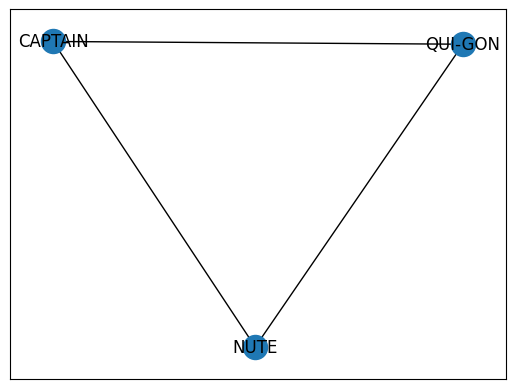

In [21]:
nx.draw_networkx(G)

In [32]:
print(G)

Graph with 3 nodes and 3 edges


In [86]:
max(nodes.values())

888

## Actor-Actor network function

In [22]:
## Actor-Actor network
def ActorNetwork(ds,min_node=0,min_edge=0):
    from collections import defaultdict
    edges = defaultdict(int)
    nodes = defaultdict(int)
    for ii in set(ds['scene_num']):
        act=ds[ds['scene_num']==ii]['actor']
        act=set(act)
        for (n1,n2) in list(combinations(act,2)):
            edges[(n1,n2)] += 1
            nodes[n1] += 1
            nodes[n2] += 1
    # filltering
    nodes = { n:v for (n,v) in nodes.items() if v>=min_node }
    edges = { (n1,n2):v for ((n1,n2),v) in edges.items() if v>=min_edge and n1 in nodes and n2 in nodes }
    return (nodes, edges) 



네트워크 시각화를 위한 함수 정의

In [91]:
def drawSWNetworkFORaa(edges, nodes, title, min_display=0 ) :
    # draw graph for Actor-Actor
    G=nx.Graph()
    for (n,v) in edges.items():
        G.add_edge(n[0],n[1],weight=v)
        
    pos=nx.spring_layout(G, k=.1) # positions for all nodes
    nx.draw(G,pos,with_labels=False
        ,node_size = [v*4 for v in nodes.values()] # node size
        ,node_color=list(nodes.values()) # data for label color
        ,cmap='Spectral' # color_map
        ,edge_color='grey' # data for edge color
        ,width=[d/10 for d in edges.values()] # edge width
       )
    labels = {} 
    for (n,v) in nodes.items():
        labels[n] =  '' if v<=min_display else n.replace(' ','\n')
    ax = nx.draw_networkx_labels(G, pos, labels, font_size=12, font_color="k")
    plt.title(title, fontsize=14)



## 네트워크 구조 확인
**AA network**

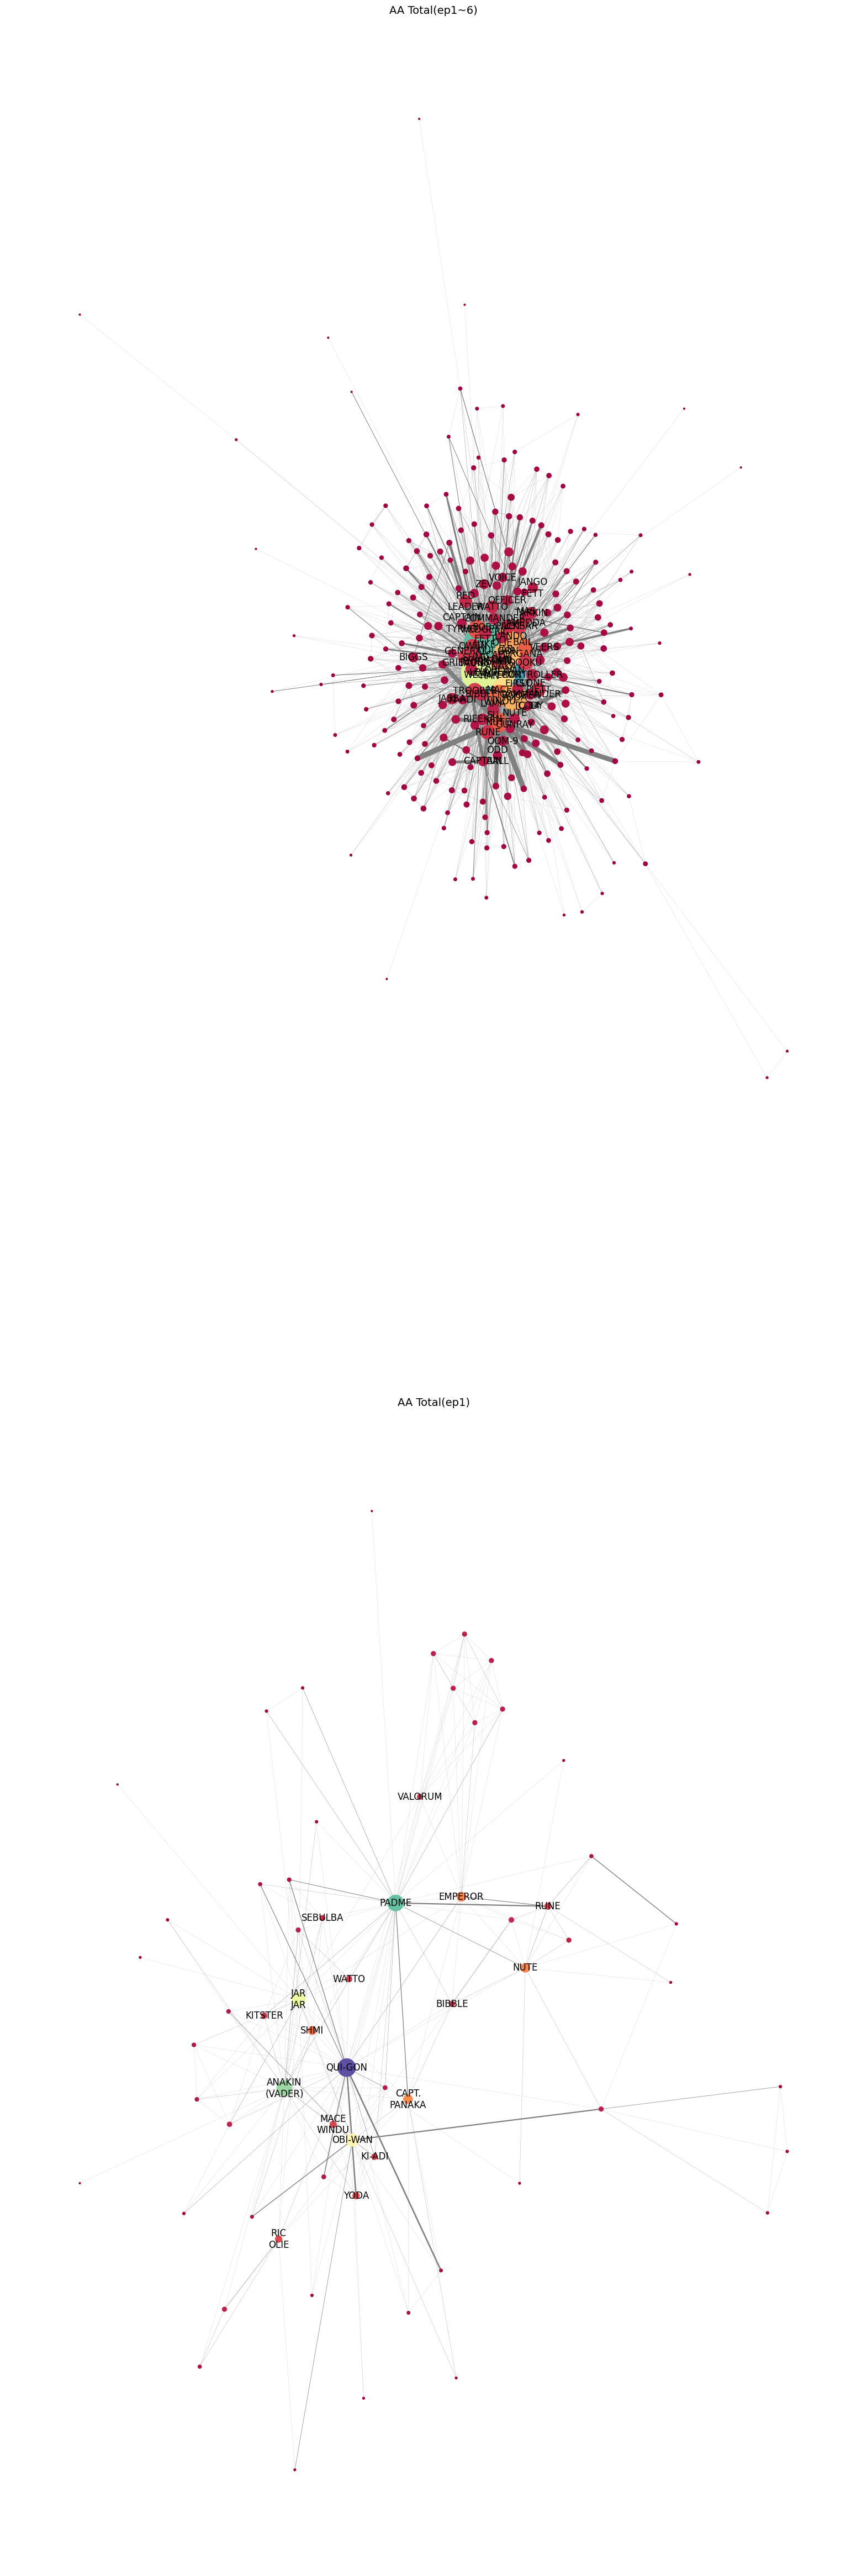

In [92]:
fig = plt.figure()
fig.set_size_inches(20, 60)
(nodes, edges) = ActorNetwork(ds=total_df,min_node=1)
fig.add_subplot(211)
plt.grid()
drawSWNetworkFORaa( edges, nodes, 'AA Total(ep1~6)', min_display=30)
(nodes, edges) = ActorNetwork(ds=ep1_df,min_node=1)
fig.add_subplot(212)
plt.grid()
drawSWNetworkFORaa( edges, nodes, 'AA Total(ep1)', min_display=10)


**AP network**

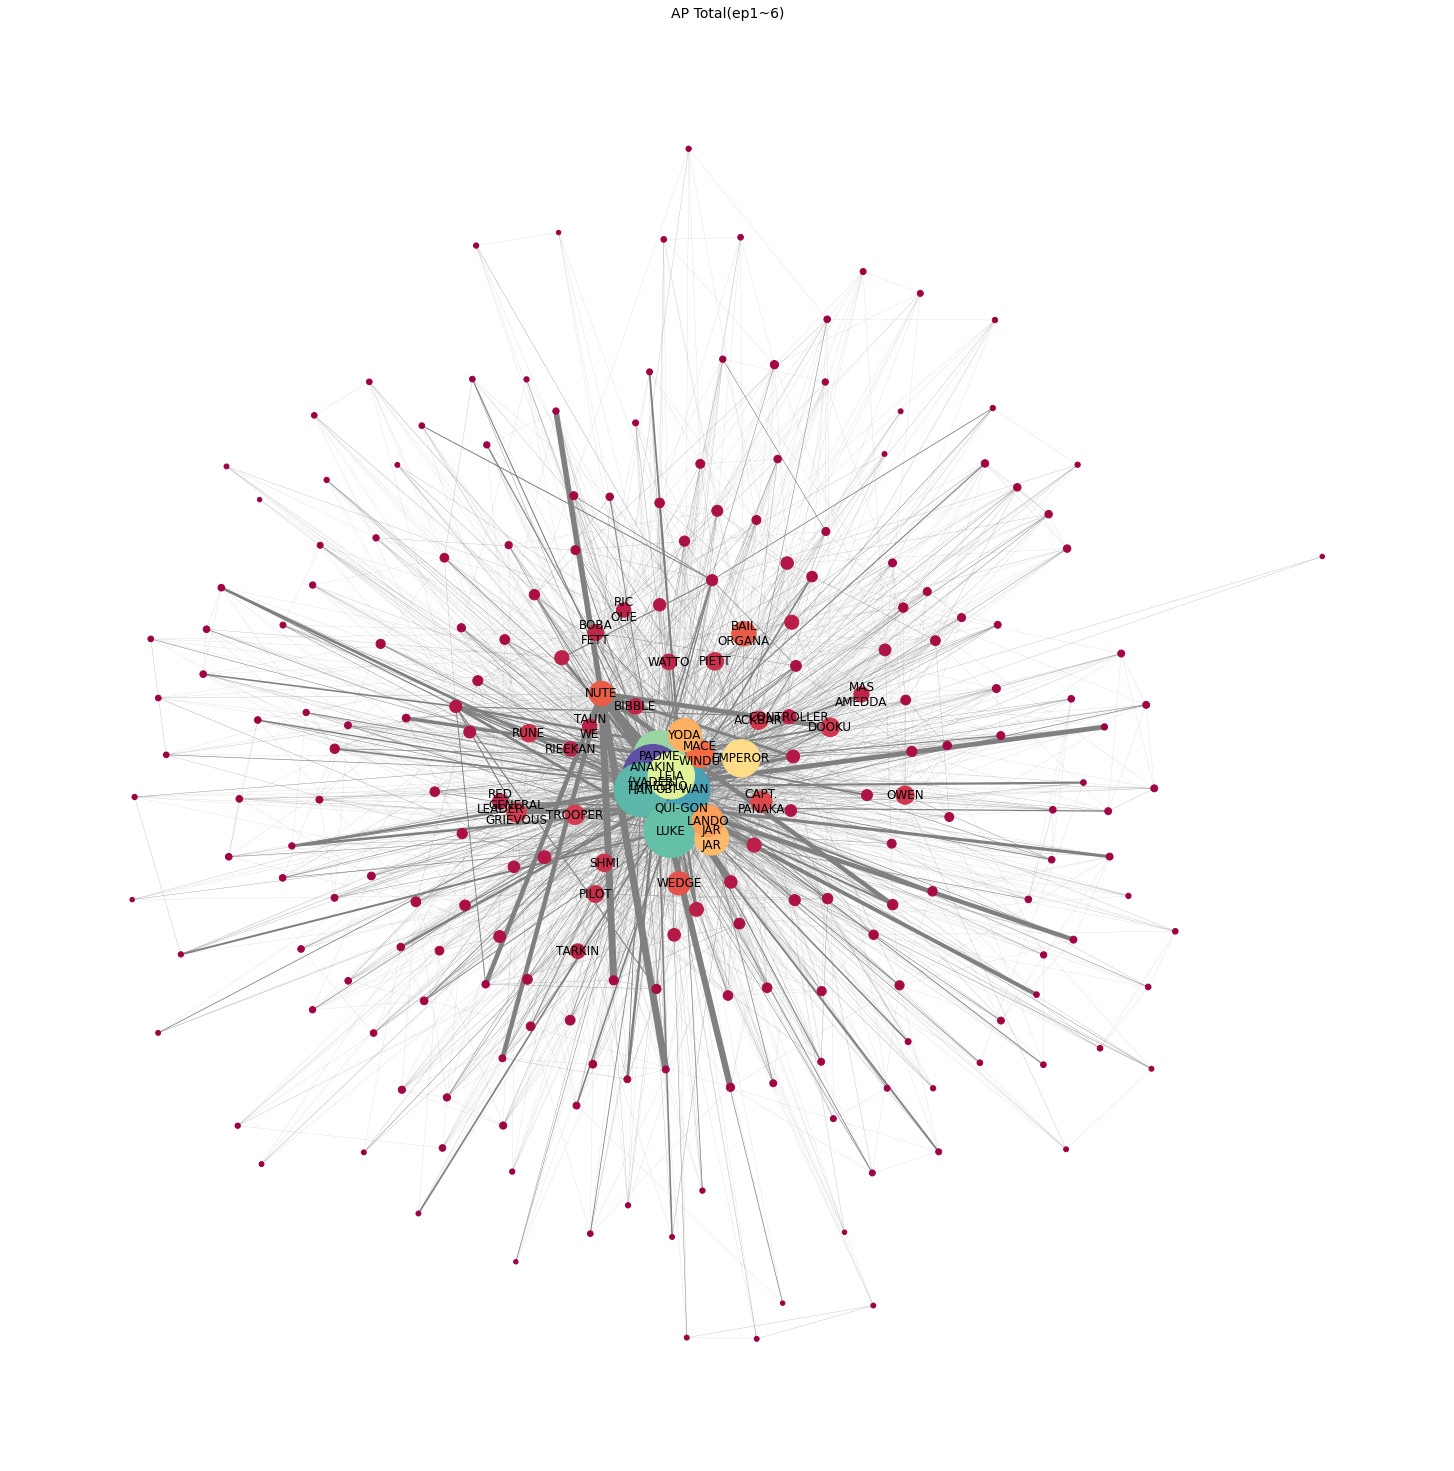

In [49]:
fig = plt.figure()
fig.set_size_inches(20, 20)
(nodes, edges) = ActorNetwork(ds=total_df,min_node=5)
drawSWNetworkFORaa( edges, nodes, 'AP Total(ep1~6)', min_display=50)

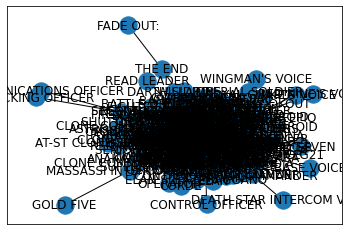

## 네트워크 노드 분석
**AA network**

In [96]:
(nodes,edges) = ActorNetwork(total_df,min_node=0)
G = nx.Graph()
G.add_nodes_from(nodes.keys())
nx.set_node_attributes(G,name='weight',values=nodes)
G.add_edges_from(edges.keys())
nx.set_edge_attributes(G,name='weight',values=edges)
## Define distance
weight = dict(nx.get_edge_attributes(G,'weight'))
distance={n:1./w for n,w in weight.items()}
nx.set_edge_attributes(G,name='distance',values=distance)

In [28]:
distance

{('SHUTTLE CAPTAIN', 'NUTE'): 1.0,
 ('SHUTTLE CAPTAIN', 'CAPTAIN'): 1.0,
 ('SHUTTLE CAPTAIN', 'THREEPIO'): 1.0,
 ('SHUTTLE CAPTAIN', 'QUI-GON'): 1.0,
 ('NUTE', 'CAPTAIN'): 0.5,
 ('NUTE', 'THREEPIO'): 0.5,
 ('NUTE', 'QUI-GON'): 1.0,
 ('NUTE', 'TC-14'): 0.5,
 ('NUTE', 'ANAKIN (VADER)'): 0.1,
 ('NUTE', 'OBI-WAN'): 0.14285714285714285,
 ('NUTE', 'STRANGE VOICE'): 1.0,
 ('NUTE', 'HAN'): 0.08333333333333333,
 ('NUTE', 'DOFINE'): 1.0,
 ('NUTE', 'RIEEKAN'): 0.5,
 ('NUTE', 'BIB'): 1.0,
 ('NUTE', 'EMPEROR'): 0.16666666666666666,
 ('NUTE', 'MACE WINDU'): 0.5,
 ('NUTE', 'YODA'): 0.3333333333333333,
 ('NUTE', 'BAIL ORGANA'): 0.5,
 ('NUTE', 'KI-ADI-MUNDI'): 1.0,
 ('NUTE', 'ODD BALL'): 0.5,
 ('NUTE', 'DAR WAC'): 1.0,
 ('NUTE', 'LEIA'): 0.14285714285714285,
 ('NUTE', 'PADME'): 0.1111111111111111,
 ('NUTE', 'JABBA'): 1.0,
 ('NUTE', 'OWO-1'): 1.0,
 ('NUTE', 'RUNE'): 1.0,
 ('NUTE', 'LUKE'): 0.2,
 ('NUTE', 'JAR JAR'): 0.5,
 ('NUTE', 'CAPTAIN TYPHO'): 1.0,
 ('NUTE', 'DECK OFFICER'): 1.0,
 ('NUTE', 'NINEDEN

/tmp/ipykernel_83381/469950172.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  A = nx.to_numpy_array(G, dtype=np.bool)#adjacency matrix


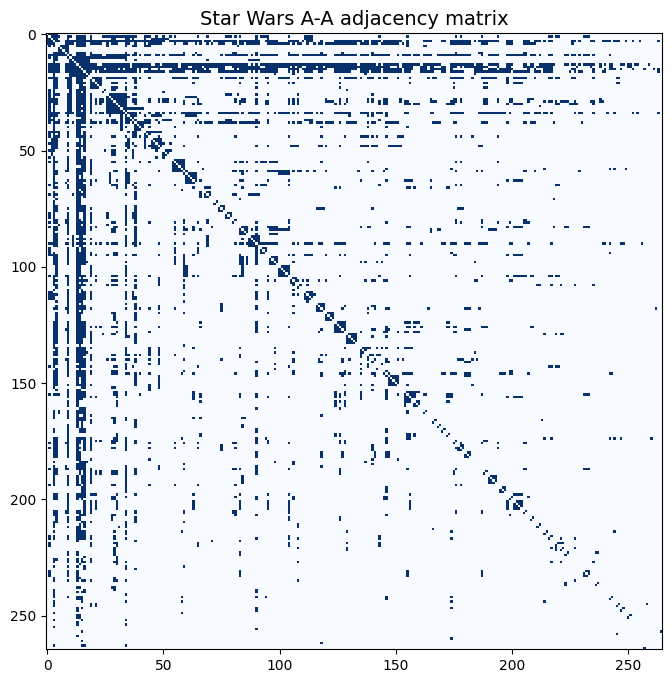

In [29]:
#show adjacency matrix
A = nx.to_numpy_array(G, dtype=np.bool)#adjacency matrix
plt.figure(1, figsize=(8, 8))# control figure size
plt.imshow(A,
           cmap="Blues",# color map
           interpolation="none"
           )
plt.title('Star Wars A-A adjacency matrix', fontsize=14);

In [30]:
## compute BC
bc = nx.betweenness_centrality(G)
bc2= nx.betweenness_centrality(G,weight='distance')
## compute CC
cc = nx.closeness_centrality(G)
cc2= nx.closeness_centrality(G,distance='distance')


In [35]:
#bc2.values()

In [33]:
def gen_df(dc,dc2,col1,col2):
  ## arrange
  import operator
  sorted_x = sorted(dc.items(), key=operator.itemgetter(1))
  sorted_x.reverse()
  sorted_x2 = sorted(dc2.items(), key=operator.itemgetter(1))
  sorted_x2.reverse()

  actors = set(total_df.actor)

  ## seperate actor and place
  # structure
  sort_actor={}
  for AP,v in sorted_x:
      sort_actor[AP]=v
  sorted_actor = sorted(sort_actor.items(), key=operator.itemgetter(1))
  sorted_actor.reverse()
  Actor=pd.DataFrame(sorted_actor,columns=col1)

  # with weight
  sort_actor={}
  for AP,v in sorted_x2:
      sort_actor[AP]=v
  sorted_actor = sorted(sort_actor.items(), key=operator.itemgetter(1))
  sorted_actor.reverse()
  Actor2=pd.DataFrame(sorted_actor,columns=col2)
  return pd.concat([Actor,Actor2],axis=1)

In [34]:
aa_table_bc = gen_df(bc,bc2,['actor','BC'],['actor','w_BC'])
aa_table_cc = gen_df(cc,cc2,['actor','CC'],['actor','w_CC'])
aa_table = pd.concat([aa_table_bc,aa_table_cc],axis=1)
aa_table[:10]

actor        BC           actor      w_BC           actor  \
0  ANAKIN (VADER)  0.189330  ANAKIN (VADER)  0.337845  ANAKIN (VADER)   
1        THREEPIO  0.122027        THREEPIO  0.207750        THREEPIO   
2         OBI-WAN  0.107209         OBI-WAN  0.167857         OBI-WAN   
3            LUKE  0.099151            LUKE  0.139535             HAN   
4           PADME  0.095881           PADME  0.134987           PADME   
5             HAN  0.085559             HAN  0.117612            LUKE   
6            LEIA  0.049608         EMPEROR  0.054784            LEIA   
7         QUI-GON  0.034361         QUI-GON  0.038153         QUI-GON   
8         EMPEROR  0.033956         JAR JAR  0.036480         EMPEROR   
9            YODA  0.024986            YODA  0.031012         JAR JAR   

         CC           actor      w_CC  
0  0.809816  ANAKIN (VADER)  1.333616  
1  0.752137         OBI-WAN  1.327991  
2  0.743662             HAN  1.321378  
3  0.723288        THREEPIO  1.319990  
4  0.721311           PADME  1.319631  
5  0.713514            LUKE  1.313338  
6  0.661654         QUI-GON  1.309845  
7  0.642336         JAR JAR  1.297656  
8  0.628571         EMPEROR  1.292001  
9  0.609700            YODA  1.261179

In [ ]:
nx.

In [36]:
def drawSWNetworkFORaa_bc(edges, nodes, title, min_display=0 ) :
    # draw graph for Actor-Actor
    G=nx.Graph()
    for (n,v) in edges.items():
        G.add_edge(n[0],n[1],weight=v)
        
    bc = nx.betweenness_centrality(G)
    
    pos=nx.spring_layout(G, iterations=200, k=5) # positions for all nodes
    nx.draw(G,pos,with_labels=False
        ,node_size = [50000*v for v in bc.values()] # node size
        ,node_color=list(bc.values()) # data for label color
        ,cmap='Spectral' # color_map
        ,edge_color='grey' # data for edge color
        ,width=[d/10 for d in edges.values()] # edge width
       )
    labels = {} 
    for (n,v) in nodes.items():
        labels[n] =  '' if v<=min_display else n.replace(' ','\n')
    ax = nx.draw_networkx_labels(G, pos, labels, font_size=12, font_color="k")
    plt.title(title, fontsize=14)



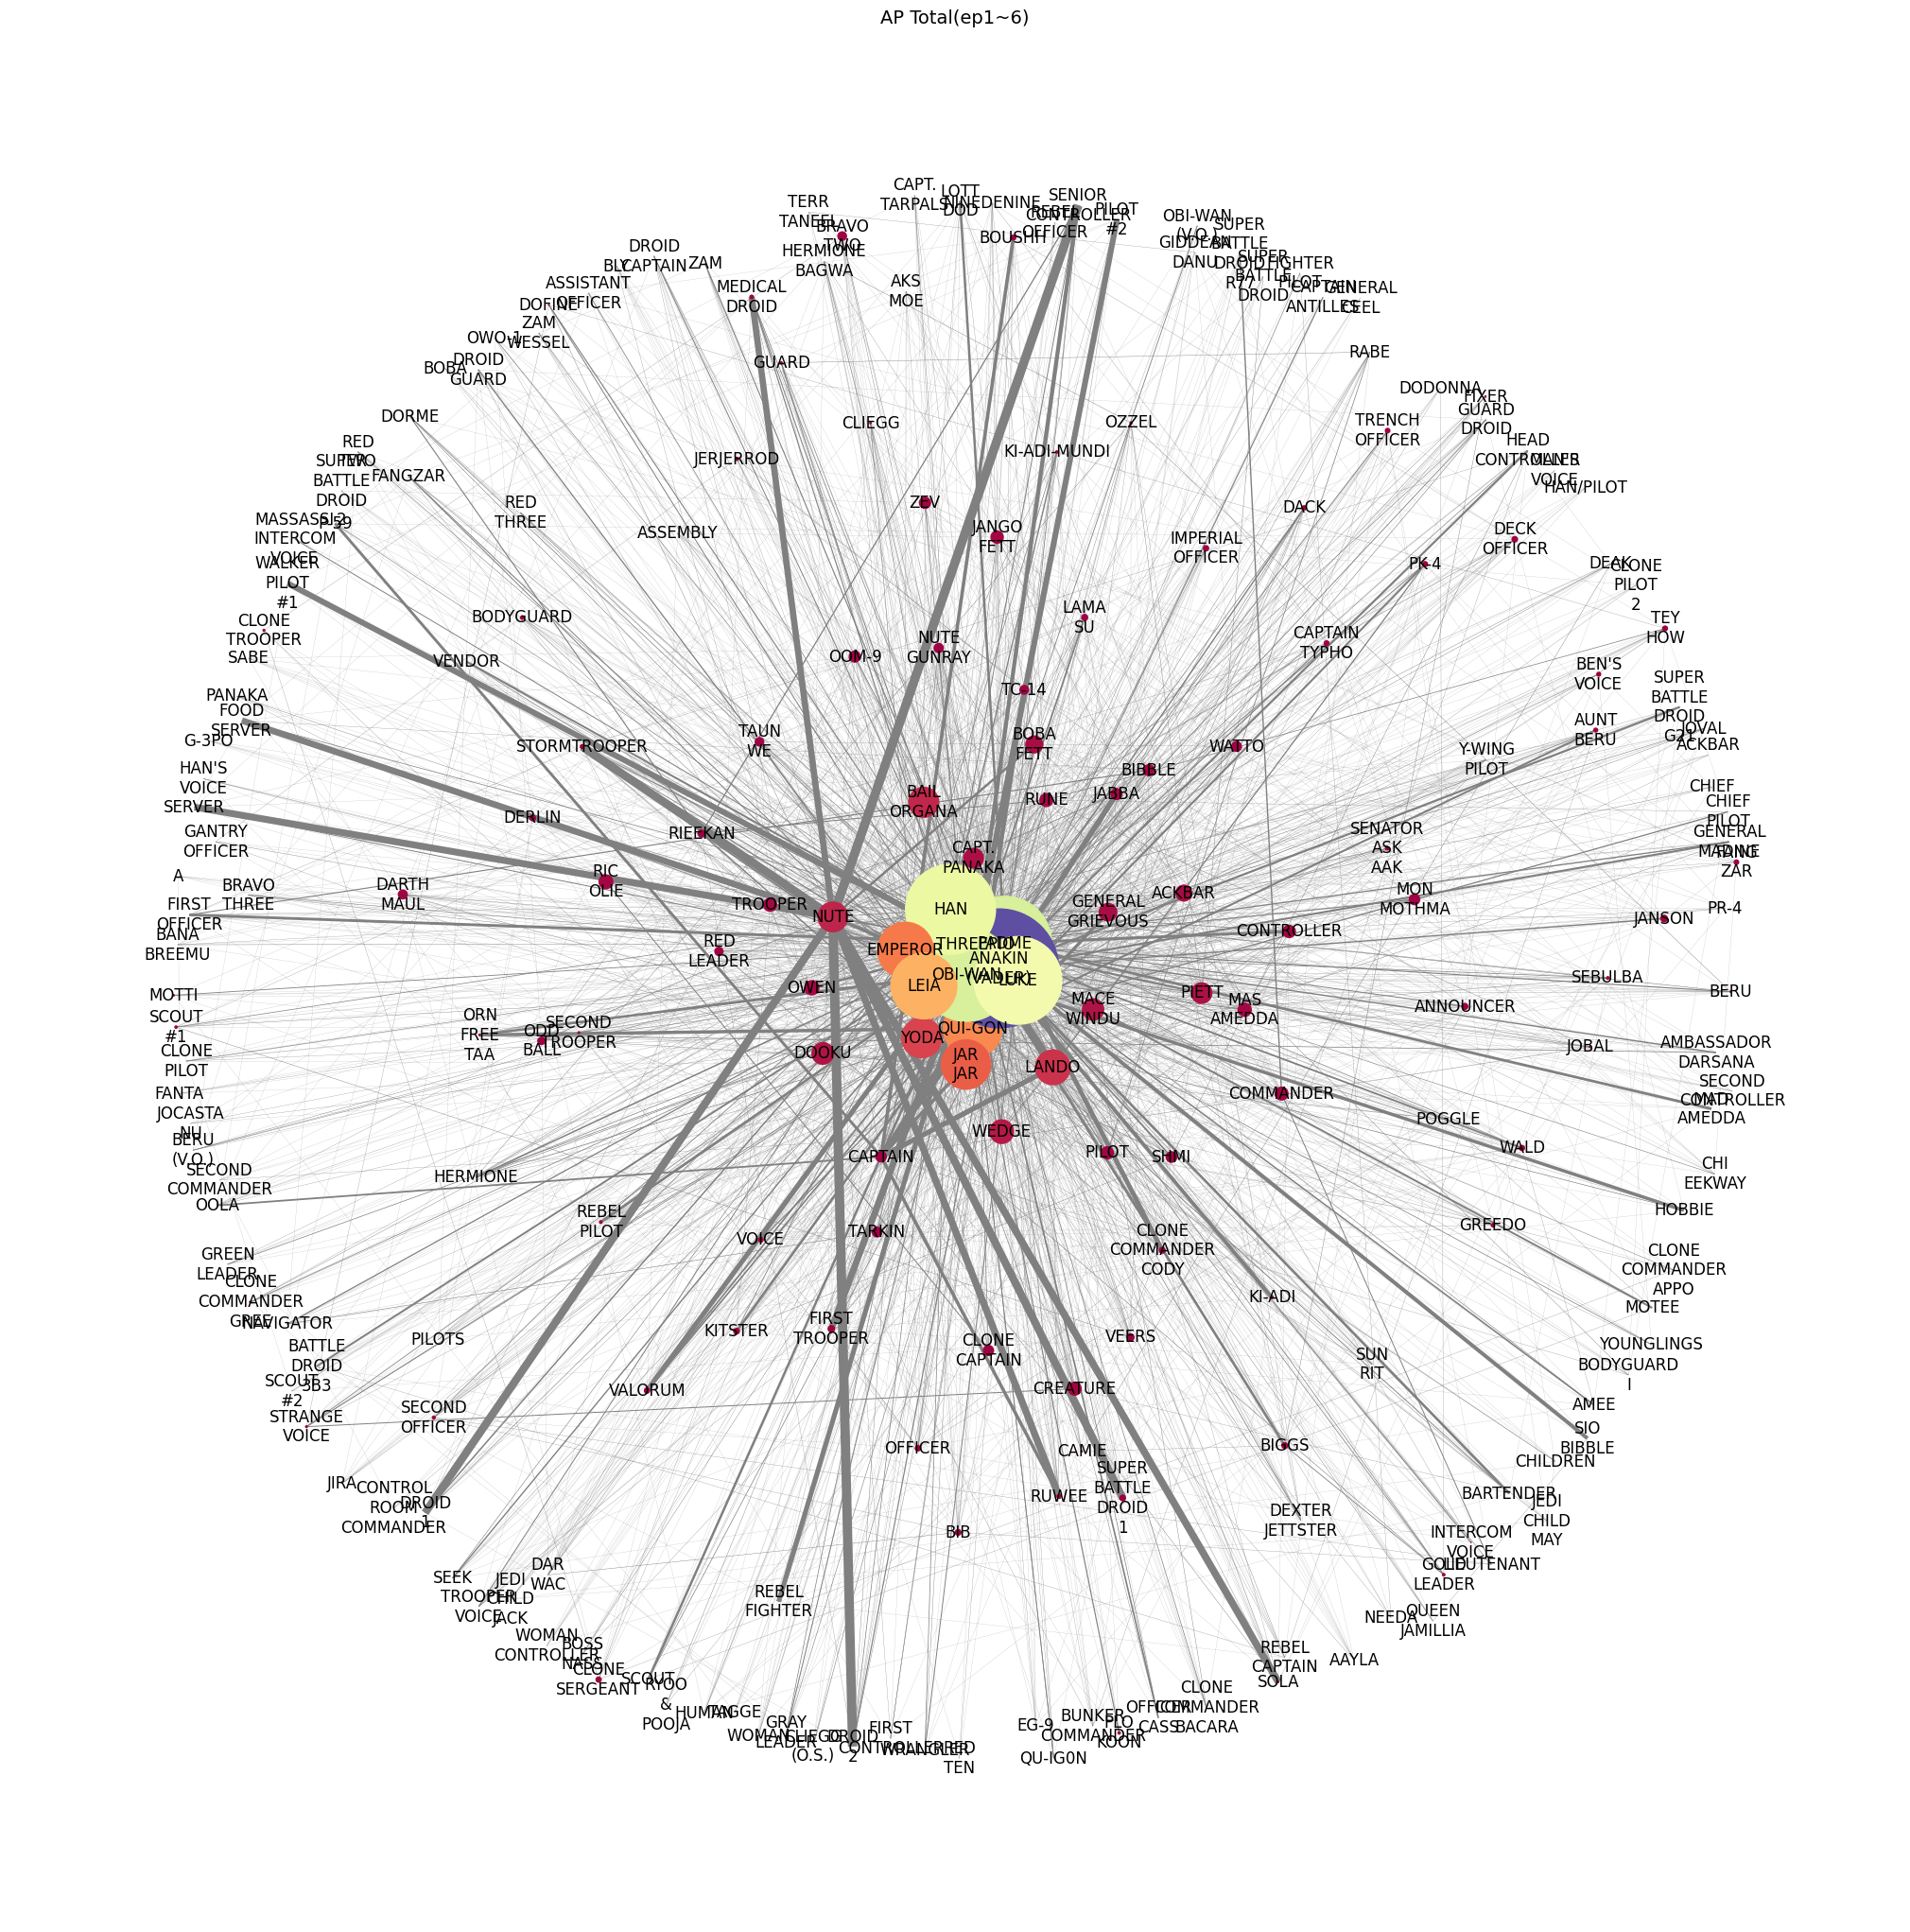

In [37]:
fig = plt.figure()
fig.set_size_inches(20, 20)
(nodes, edges) = ActorNetwork(ds=total_df,min_node=5)
drawSWNetworkFORaa_bc( edges, nodes, 'AP Total(ep1~6)', min_display=0)

In [38]:
total_df.head(10)

Unnamed: 0  episode  scene_num  sequence                  place type  \
0           0        1          1         1       REPUBLIC CRUISER  INT   
1           1        1          1         2       REPUBLIC CRUISER  INT   
2           2        1          1         3       REPUBLIC CRUISER  INT   
3           3        1          1         4       REPUBLIC CRUISER  INT   
4           4        1          1         5       REPUBLIC CRUISER  INT   
5           5        1          1         6       REPUBLIC CRUISER  INT   
6           6        1          3         7  FEDERATION BATTLESHIP  INT   
7           7        1          3         8  FEDERATION BATTLESHIP  INT   
8           8        1          3         9  FEDERATION BATTLESHIP  INT   
9           9        1          3        10  FEDERATION BATTLESHIP  INT   

     actor                                           dialogue  
0  QUI-GON                                           Captain.  
1  CAPTAIN                                          Yes, sir?  
2  QUI-GON                Tell them we wish to board at once.  
3  CAPTAIN                                          Yes, sir.  
4  CAPTAIN  With all due respect for the Trade Federation,...  
5     NUTE  Yes, yes, of coarse...ahhh...as you know, our ...  
6     PK-4  They must be important if the Viceroy sent one...  
7    TC-14       I'm TC-14 at your service. This way, please.  
8     EG-9  A Republic cruiser! That's trouble...don't you...  
9     PR-4                             I'm not made to think.

In [39]:
total_df['place']

0       REPUBLIC CRUISER
1       REPUBLIC CRUISER
2       REPUBLIC CRUISER
3       REPUBLIC CRUISER
4       REPUBLIC CRUISER
              ...       
5402              FOREST
5403              FOREST
5404              FOREST
5405              FOREST
5406              FOREST
Name: place, Length: 5407, dtype: object

### Problems

We would like to analyze a network that connects actors who are acting in the same place. You can use the data fle,'StarWars_scripts.xlsx'. That is, Actor-Actor-Place network.(Pick the suitable one episode)

1. Create the Actor-Actor-Place network and draw the graph similar to "drawSWNetworkFORaa" function.
2. Draw the histogram of the number in descending order where two actors act in the Actor-Actor-Place network. 
3. Calulate BC, CC anc pagerank in the Actor-Actor-Place network and draw the network similar to "drawSWNetworkFORaa" function(change the node size and color depending to the measurements).
4. For each network with different measurement(BC, CC and Pagerank), what properties can you describe from the episode's scenario?

